# La consigna decia que podiamos poner tantos notebooks como nos parezca, quizas podemos hacer uno sobre los datos, como preprocesamos etc y otro sobre los modelos?? ni idea, desp vemos que formato nos copa, x ahora le puse este nombre al archivo pero desp cambiamos segun nos parezca

In [2]:
%load_ext autoreload
%autoreload 2

In [21]:
import pandas as pd
from src.utils import filtrar_meses, verificar_columnas_y_tipos, estandarizar_nombres_columnas
from src.utils import funciones 

In [3]:
ruta_24 = "data/recorridos/raw/trips_2024.csv"
data_24 = pd.read_csv(ruta_24)
meses_a_eliminar = [8, 9, 10, 11, 12]
data_pr_24_a, filas_eliminadas_a = filtrar_meses(data_24, "fecha_origen_recorrido", meses_a_eliminar)
print(f"Se eliminaron {filas_eliminadas_a} filas.")
data_pr_24, filas_eliminadas = filtrar_meses(data_pr_24_a, "fecha_destino_recorrido", meses_a_eliminar)
print(f"Se eliminaron {filas_eliminadas} filas.")
ruta_salida = "data/recorridos/processed/trips_2024_pr.csv"
data_pr_24.to_csv(ruta_salida, index=False) #elimina los viajes que arrnacaron desde agosto en adelante y tambien aquellos terminados en agosto 
#(ejemplo uno q arranco la ultima noche del mes de julio y termino en agosto) Es correcto?? o deberiamos quedarnos con esos??

Se eliminaron 1649832 filas.
Se eliminaron 92 filas.


In [4]:
df_2020 = pd.read_csv("data/recorridos/raw/trips_2020.csv", index_col=0)
df_2020 = df_2020.reset_index(drop=True)
df_2020.to_csv("data/recorridos/processed/trips_2020_pr.csv", index=False)

df_2021 = pd.read_csv("data/recorridos/raw/trips_2021.csv", index_col=0)
df_2021 = df_2021.drop(columns=[col for col in ['Género'] if col in df_2021.columns])
df_2021 = df_2021.reset_index(drop=True)
df_2021.to_csv("data/recorridos/processed/trips_2021_pr.csv", index=False)

df_2022 = pd.read_csv("data/recorridos/raw/trips_2022.csv", index_col=0)
df_2022 = df_2022.drop(columns=[col for col in ['X'] if col in df_2022.columns])
df_2022 = df_2022.reset_index(drop=True)
df_2022.to_csv("data/recorridos/processed/trips_2022_pr.csv", index=False)

df_2023 = pd.read_csv("data/recorridos/raw/trips_2023.csv", index_col=0)
df_2023 = df_2023.reset_index(drop=True)
df_2023.to_csv("data/recorridos/processed/trips_2023_pr.csv", index=False)

C:\Users\Catalina\AppData\Local\Temp\ipykernel_15144\2246478468.py:5: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("data/recorridos/raw/trips_2021.csv", index_col=0)


In [31]:
archivos = [
    "data/recorridos/processed/trips_2020_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2024_pr.csv",
]
estandarizar_nombres_columnas(archivos)
anios = [2020, 2021, 2022, 2023]

for anio in [2020, 2023]:
    ruta = f"data/recorridos/processed/trips_{anio}_pr.csv"
    df = pd.read_csv(ruta)
    df = df.dropna()
    df.to_csv(ruta, index=False)

for anio in anios:
    print(f"Procesando año {anio}...")
    ruta = f"data/recorridos/processed/trips_{anio}_pr.csv"
    df = pd.read_csv(ruta)
    df_limpio = funciones[str(anio)](df)
    df_limpio.to_csv(ruta, index=False)

verificar_columnas_y_tipos(archivos)


No se encontraron columnas para renombrar en data/recorridos/processed/trips_2020_pr.csv.


/Users/athinasalim/Desktop/Machine/FINAL_ML/src/utils.py:57: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


No se encontraron columnas para renombrar en data/recorridos/processed/trips_2021_pr.csv.
No se encontraron columnas para renombrar en data/recorridos/processed/trips_2022_pr.csv.
No se encontraron columnas para renombrar en data/recorridos/processed/trips_2023_pr.csv.
No se encontraron columnas para renombrar en data/recorridos/processed/trips_2024_pr.csv.
Procesando año 2020...
Procesando año 2021...


/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/3599240414.py:20: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)


Procesando año 2022...
Procesando año 2023...


/Users/athinasalim/Desktop/Machine/FINAL_ML/src/utils.py:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)



Usando 'data/recorridos/processed/trips_2024_pr.csv' como referencia.

Verificando: data/recorridos/processed/trips_2020_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2021_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2022_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2023_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2024_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------


In [32]:
import pandas as pd
import os

# Configuración para ver todo el DataFrame sin truncamiento
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

archivos = [
    "data/recorridos/processed/trips_2020_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2024_pr.csv",
]

anios = [2020, 2021, 2022, 2023, 2024]
estaciones_por_anio = {}

# Leer y acumular estaciones por año (por ID)
for archivo, anio in zip(archivos, anios):
    if not os.path.exists(archivo):
        print(f"⚠️ Archivo no encontrado para el año {anio}")
        continue

    df = pd.read_csv(archivo)
    estaciones_origen = df['id_estacion_origen'].dropna().unique()
    estaciones_destino = df['id_estacion_destino'].dropna().unique()
    estaciones = set(estaciones_origen).union(set(estaciones_destino))
    estaciones_por_anio[anio] = estaciones

# Construcción de tabla de presencia
todas_las_estaciones = sorted(set.union(*estaciones_por_anio.values()))
tabla_presencia = pd.DataFrame(index=todas_las_estaciones)

for anio in anios:
    estaciones = estaciones_por_anio.get(anio, set())
    tabla_presencia[anio] = ["✓" if est in estaciones else "" for est in tabla_presencia.index]

# Contar cuántos años aparece cada estación
tabla_presencia["Anios_presente"] = tabla_presencia[anios].apply(lambda row: sum(cell == "✓" for cell in row), axis=1)

# Ordenar por cantidad de años presente (ascendente)

tabla_presencia = tabla_presencia.sort_index()
# Mostrar tabla completa
print("\n📋 Presencia de estaciones por año (por ID, ordenadas por cantidad de años presentes):")
print(tabla_presencia)

# Mostrar cantidad total de estaciones por año
print("\n📈 Cantidad de estaciones por año:")
for anio in anios:
    cantidad = len(estaciones_por_anio.get(anio, set()))
    print(f"  - {anio}: {cantidad} estaciones")

/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/4068507259.py:27: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)



📋 Presencia de estaciones por año (por ID, ordenadas por cantidad de años presentes):
    2020 2021 2022 2023 2024  Anios_presente
2      ✓    ✓    ✓    ✓    ✓               5
3      ✓    ✓    ✓    ✓    ✓               5
4      ✓    ✓    ✓    ✓    ✓               5
5      ✓    ✓    ✓    ✓    ✓               5
6      ✓    ✓    ✓    ✓    ✓               5
7      ✓    ✓    ✓    ✓    ✓               5
8      ✓    ✓    ✓    ✓    ✓               5
9      ✓    ✓    ✓    ✓    ✓               5
11     ✓                                   1
12     ✓    ✓    ✓    ✓    ✓               5
13     ✓    ✓    ✓    ✓    ✓               5
14     ✓    ✓    ✓    ✓    ✓               5
15     ✓                                   1
17     ✓    ✓    ✓    ✓    ✓               5
19     ✓                                   1
20     ✓    ✓    ✓                         3
21     ✓    ✓    ✓    ✓    ✓               5
22     ✓    ✓    ✓    ✓    ✓               5
23     ✓    ✓    ✓    ✓    ✓               5
24     ✓    ✓

In [33]:
print("\n🔍 Estaciones que aparecían en años anteriores pero NO en 2024:")

estaciones_2024 = estaciones_por_anio.get(2024, set())

for anio in [2020, 2021, 2022, 2023]:
    estaciones_anio = estaciones_por_anio.get(anio, set())
    solo_en_anio = sorted(estaciones_anio - estaciones_2024)
    print(f"\n➡️ Estaciones en {anio} pero NO en 2024 ({len(solo_en_anio)}):")
    print(solo_en_anio)


🔍 Estaciones que aparecían en años anteriores pero NO en 2024:

➡️ Estaciones en 2020 pero NO en 2024 (121):
[11, 15, 19, 20, 28, 30, 31, 39, 40, 42, 47, 52, 53, 55, 62, 72, 78, 84, 88, 90, 95, 105, 106, 110, 115, 119, 127, 141, 143, 154, 170, 173, 180, 185, 192, 195, 201, 205, 214, 217, 218, 221, 224, 225, 226, 233, 238, 240, 244, 246, 249, 250, 256, 266, 272, 274, 276, 279, 282, 283, 285, 286, 287, 288, 290, 292, 293, 294, 295, 296, 297, 298, 300, 303, 305, 306, 312, 314, 317, 319, 320, 321, 325, 326, 328, 332, 337, 338, 339, 341, 343, 345, 347, 350, 351, 352, 354, 356, 377, 380, 388, 389, 390, 391, 394, 396, 397, 398, 399, 401, 404, 405, 406, 409, 411, 415, 419, 421, 430, 442, 447]

➡️ Estaciones en 2021 pero NO en 2024 (15):
[20, 30, 42, 84, 95, 105, 205, 214, 249, 288, 294, 447, 456, 459, 462]

➡️ Estaciones en 2022 pero NO en 2024 (17):
[20, 28, 30, 31, 84, 95, 205, 214, 249, 294, 337, 419, 442, 447, 456, 459, 462]

➡️ Estaciones en 2023 pero NO en 2024 (7):
[30, 31, 95, 205, 23

In [34]:
from src.utils import verificar_consistencia_coordenadas

# Verificar 2024
verificar_consistencia_coordenadas("data/recorridos/processed/trips_2024_pr.csv", anio=2024)



🔍 Verificando consistencia de coordenadas en 2024...
✅ Todas las estaciones tienen coordenadas consistentes.


In [35]:
import pandas as pd
import os

# Cargar dataset de 2024
df_2024 = pd.read_csv("data/recorridos/processed/trips_2024_pr.csv")

# Construir diccionario con coordenadas por estación
coords_2024 = {}

for rol in ["origen", "destino"]:
    id_col = f"id_estacion_{rol}"
    lat_col = f"lat_estacion_{rol}"
    lon_col = f"long_estacion_{rol}"

    for _, row in df_2024.iterrows():
        est_id = row[id_col]
        lat = row[lat_col]
        lon = row[lon_col]
        if pd.notna(est_id) and pd.notna(lat) and pd.notna(lon):
            coords_2024[est_id] = (lat, lon)

# Archivos a procesar (los que serán modificados in-place)
archivos = {
    2020: "data/recorridos/processed/trips_2020_pr.csv",
    2021: "data/recorridos/processed/trips_2021_pr.csv",
    2022: "data/recorridos/processed/trips_2022_pr.csv",
    2023: "data/recorridos/processed/trips_2023_pr.csv",
}

for anio, path in archivos.items():
    if not os.path.exists(path):
        print(f"⚠️ No se encontró el archivo de {anio}")
        continue

    df = pd.read_csv(path)
    
    for rol in ["origen", "destino"]:
        id_col = f"id_estacion_{rol}"
        lat_col = f"lat_estacion_{rol}"
        lon_col = f"long_estacion_{rol}"

        def corregir_coord(row):
            est_id = row[id_col]
            if est_id in coords_2024:
                lat, lon = coords_2024[est_id]
                row[lat_col] = lat
                row[lon_col] = lon
            return row

        df = df.apply(corregir_coord, axis=1)

    # Guardar sobrescribiendo el archivo original
    df.to_csv(path, index=False)
    print(f"✅ Archivo actualizado y sobrescrito: {path}")

✅ Archivo actualizado y sobrescrito: data/recorridos/processed/trips_2020_pr.csv


/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/3849642278.py:35: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


✅ Archivo actualizado y sobrescrito: data/recorridos/processed/trips_2021_pr.csv
✅ Archivo actualizado y sobrescrito: data/recorridos/processed/trips_2022_pr.csv
✅ Archivo actualizado y sobrescrito: data/recorridos/processed/trips_2023_pr.csv


In [40]:
from src.utils import corregir_longitudes_inconsistentes
corregir_longitudes_inconsistentes("data/recorridos/processed/trips_2021_pr.csv")

/Users/athinasalim/Desktop/Machine/FINAL_ML/src/utils.py:175: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  print(f" - Estación {est_id}: difiere en long ({n_lon} longitudes distintas)")


✅ No se encontraron inconsistencias de longitud en data/recorridos/processed/trips_2021_pr.csv


In [41]:
from src.utils import corregir_latitud_estacion

path_2020 = "data/recorridos/processed/trips_2020_pr.csv"
df_2020 = pd.read_csv(path_2020)
df_2020 = corregir_latitud_estacion(df_2020, est_id=240)
df_2020.to_csv(path_2020, index=False)
corregir_longitudes_inconsistentes("data/recorridos/processed/trips_2020_pr.csv")

ℹ️ Latitud de referencia para estación 240: -34.558137
✅ Longitudes corregidas automáticamente en: data/recorridos/processed/trips_2020_pr.csv


In [42]:
for anio in [2020, 2021, 2022, 2023]:
    path = f"data/recorridos/processed/trips_{anio}_pr.csv" 
    verificar_consistencia_coordenadas(path, anio=anio)


🔍 Verificando consistencia de coordenadas en 2020...
✅ Todas las estaciones tienen coordenadas consistentes.


/Users/athinasalim/Desktop/Machine/FINAL_ML/src/utils.py:131: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  Verifica que cada estación tenga siempre las mismas coordenadas (latitud y longitud)



🔍 Verificando consistencia de coordenadas en 2021...
✅ Todas las estaciones tienen coordenadas consistentes.

🔍 Verificando consistencia de coordenadas en 2022...
✅ Todas las estaciones tienen coordenadas consistentes.

🔍 Verificando consistencia de coordenadas en 2023...
✅ Todas las estaciones tienen coordenadas consistentes.


# Armando dataset

In [ ]:
from modeling import construir_dataset_modelado

df_viajes_2020 = pd.read_csv("data/recorridos/processed/trips_2020_pr.csv")
df_usuarios_2020 = pd.read_csv("data/usuarios/processed/usuarios_ecobici_2020_limpio.csv")

df_modelado_2020 = construir_dataset_modelado(df_viajes_2020, df_usuarios_2020)

df_modelado_2020.to_csv("data/modelado/modelado_2020.csv", index=False)

/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/57125502.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


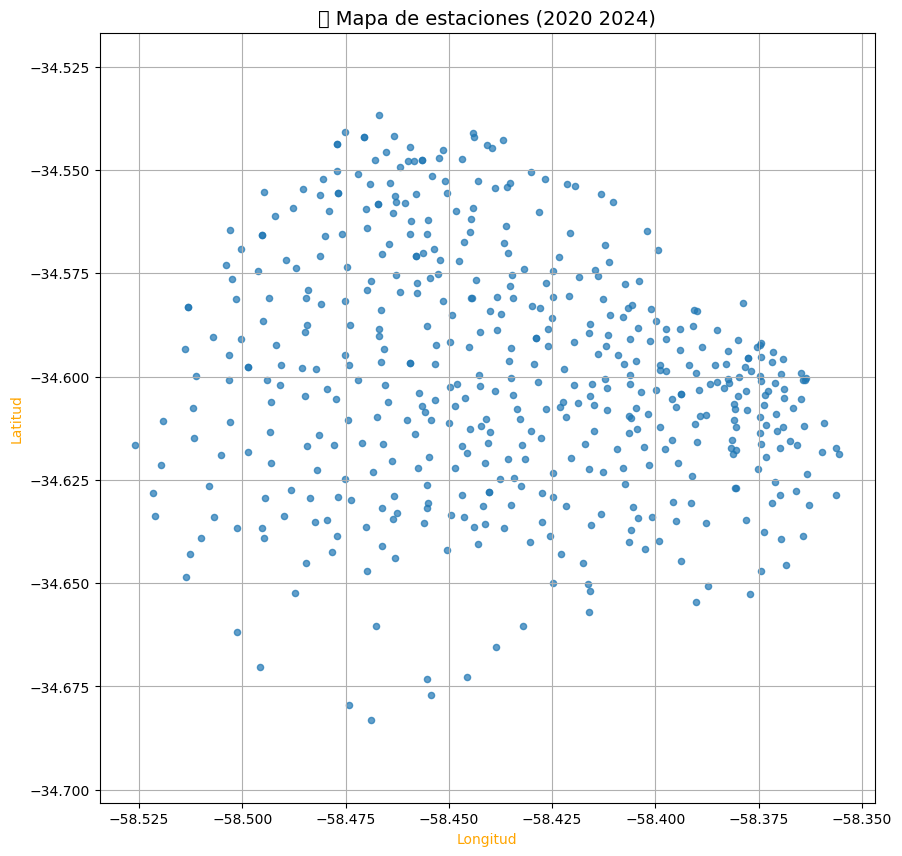

In [ ]:
import pandas as pd
import os

# Rutas de los datasets en orden descendente
archivos = [
    "data/recorridos/processed/trips_2024_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2020_pr.csv"
]

# Diccionario de estaciones únicas: id_estacion -> (lat, lon)
estaciones_dict = {}

for path in archivos:
    if not os.path.exists(path):
        print(f"⚠️ Archivo no encontrado: {path}")
        continue

    df = pd.read_csv(path)

    for rol in ["origen", "destino"]:
        for _, row in df.iterrows():
            est_id = row[f"id_estacion_{rol}"]
            lat = row[f"lat_estacion_{rol}"]
            lon = row[f"long_estacion_{rol}"]

            if pd.notna(est_id) and pd.notna(lat) and pd.notna(lon):
                if est_id not in estaciones_dict:
                    estaciones_dict[est_id] = (lat, lon)
        

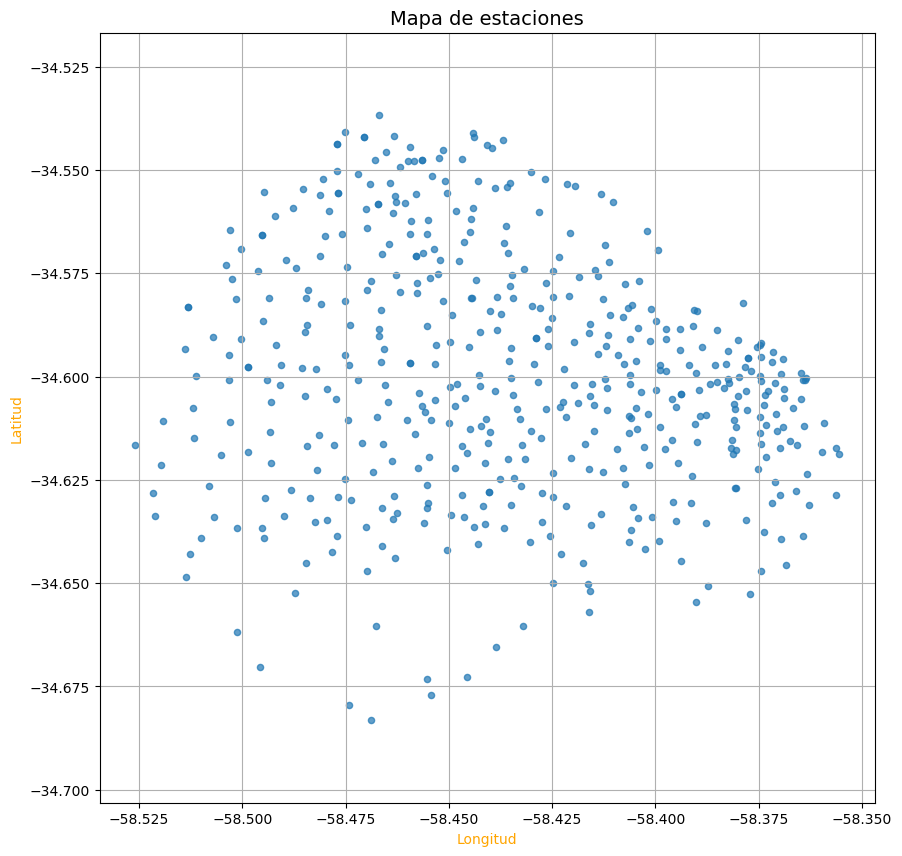

In [ ]:
df_estaciones = pd.DataFrame([
    {"id_estacion": est_id, "lat": lat, "lon": lon}
    for est_id, (lat, lon) in estaciones_dict.items()
])
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(df_estaciones["lon"], df_estaciones["lat"], alpha=0.7, s=20)
plt.title("Mapa de estaciones", fontsize=14)
plt.xlabel("Longitud", color="black")
plt.ylabel("Latitud", color="black")
plt.grid(True)
plt.axis("equal")
plt.show()

In [49]:
import geopandas as gpd

barrios_gdf = gpd.read_file("data/barrios/barrios.shp")

# Ver columnas reales
print("🧩 Columnas disponibles en el shapefile:")
print(barrios_gdf.columns)

🧩 Columnas disponibles en el shapefile:
Index(['id', 'objeto', 'nombre', 'comuna', 'perimetro_', 'area_metro',
       'geometry'],
      dtype='object')


In [51]:
print("📊 Cantidad de barrios únicos en el shapefile:", barrios_gdf["nombre"].nunique())

print("\n🗺️ Barrios:")
print(sorted(barrios_gdf["nombre"].unique()))
#total de barrios: 
print("Total de barrios:", len(barrios_gdf["nombre"].unique()))

📊 Cantidad de barrios únicos en el shapefile: 48

🗺️ Barrios:
['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO', 'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES', 'CONSTITUCION', 'FLORES', 'FLORESTA', 'LINIERS', 'MATADEROS', 'MONSERRAT', 'MONTE CASTRO', 'NUEVA POMPEYA', 'NUÑEZ', 'PALERMO', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS', 'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA', 'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO', 'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE', 'VILLA DEVOTO', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL', 'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI', 'VILLA URQUIZA']
Total de barrios: 48


In [54]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Cargar shapefile de barrios
barrios_gdf = gpd.read_file("data/barrios/barrios.shp")

# Crear GeoDataFrame desde df_estaciones (ya lo tenés construido)
df_estaciones["geometry"] = df_estaciones.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
estaciones_gdf = gpd.GeoDataFrame(df_estaciones, geometry="geometry", crs=barrios_gdf.crs)

# Join espacial (punto dentro de polígono)
estaciones_con_barrios = gpd.sjoin(estaciones_gdf, barrios_gdf, how="left", predicate="within")

# Renombrar columna para que se llame "barrio"
estaciones_con_barrios = estaciones_con_barrios.rename(columns={"nombre": "barrio"})

In [55]:
estaciones_con_barrios[["id_estacion", "lat", "lon", "barrio"]].to_csv("data/estaciones_con_barrios.csv", index=False)

In [56]:
# Crear diccionario: id_estacion -> barrio
mapa_barrio = estaciones_con_barrios.set_index("id_estacion")["barrio"].to_dict()

# Enriquecer cada dataset
for anio in [2020, 2021, 2022, 2023, 2024]:
    path = f"data/recorridos/processed/trips_{anio}_pr.csv"
    df = pd.read_csv(path)

    df["barrio_origen"] = df["id_estacion_origen"].map(mapa_barrio)
    df["barrio_destino"] = df["id_estacion_destino"].map(mapa_barrio)

    df.to_csv(path, index=False)
    print(f"✅ Enriquecido con barrios: {anio}")

✅ Enriquecido con barrios: 2020


/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/391224095.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


✅ Enriquecido con barrios: 2021
✅ Enriquecido con barrios: 2022
✅ Enriquecido con barrios: 2023
✅ Enriquecido con barrios: 2024


/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/649906229.py:39: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


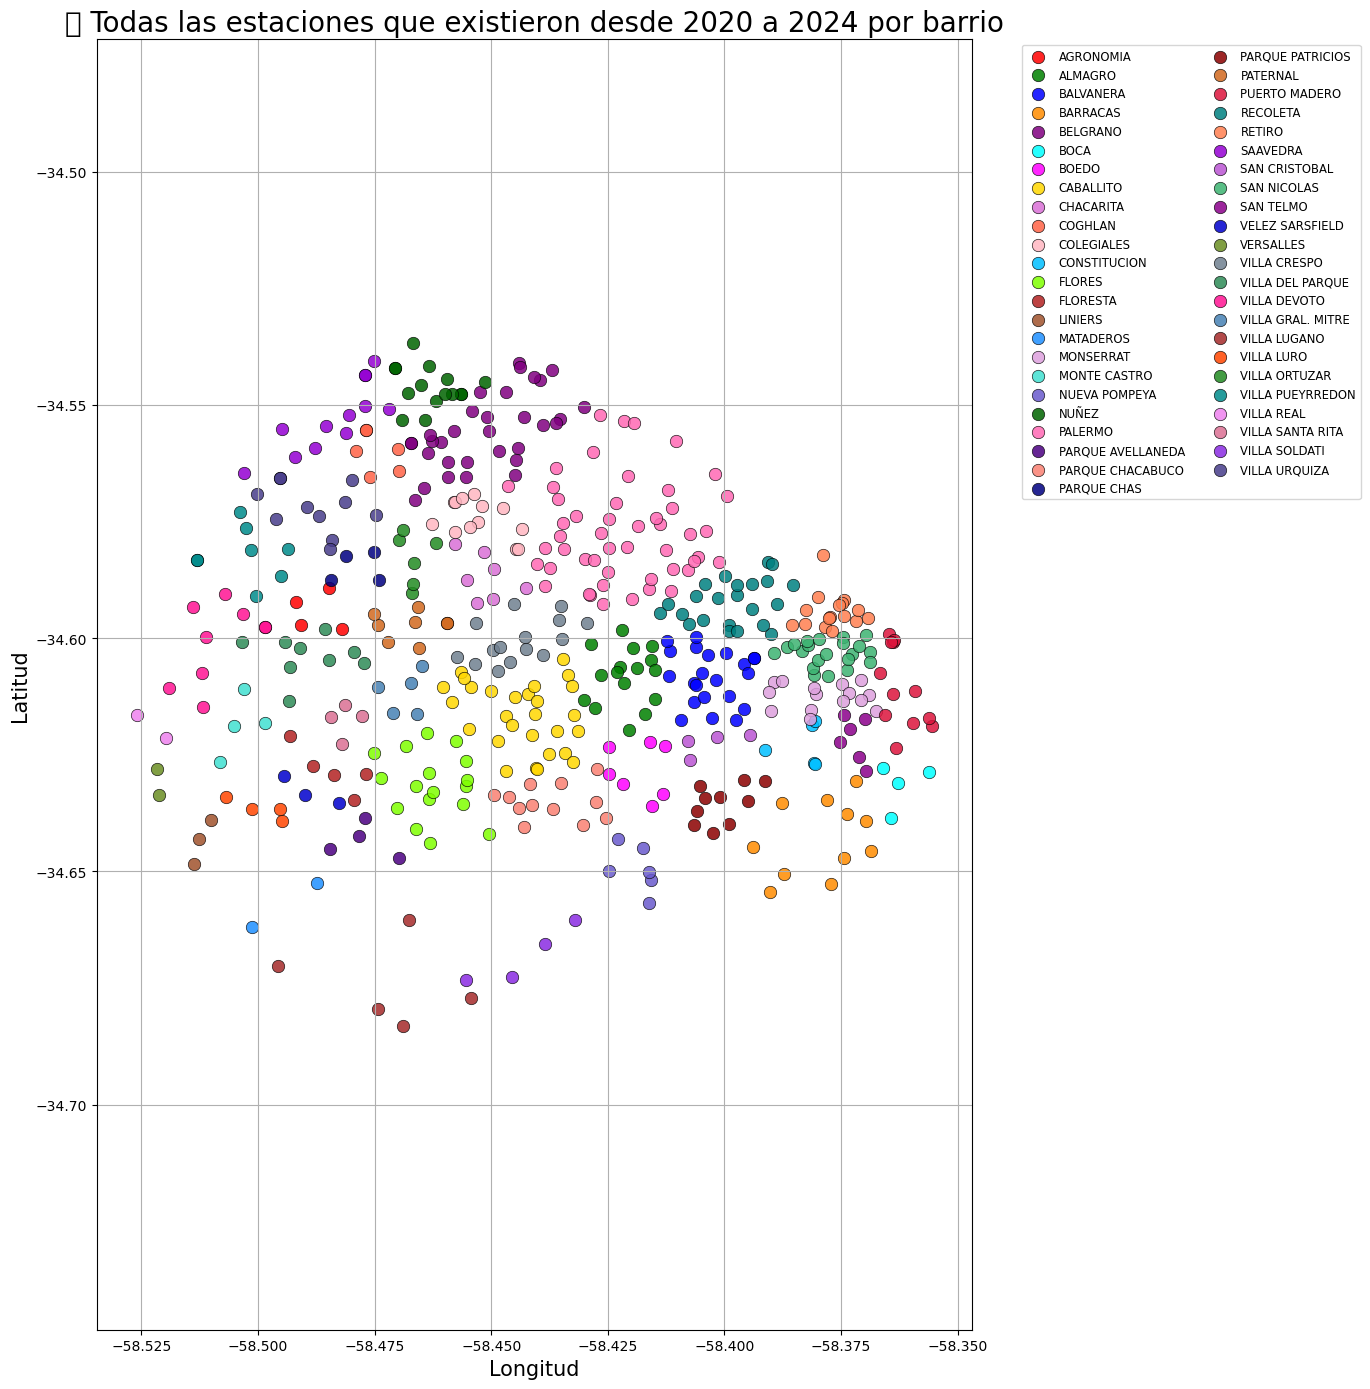

In [ ]:
colores_barrios = [
    "red", "green", "blue", "darkorange", "purple", "cyan", "magenta", "gold",
    "orchid", "tomato", "lightpink", "deepskyblue", "chartreuse", "firebrick", "sienna", "dodgerblue",
    "plum", "turquoise", "slateblue", "darkgreen", "hotpink", "indigo", "salmon", "navy",
    "darkred", "chocolate", "crimson", "teal", "coral", "darkviolet", "mediumorchid", "mediumseagreen",
    "darkmagenta", "mediumblue", "olivedrab", "slategray", "seagreen", "deeppink", "steelblue", "brown",
    "orangered", "forestgreen", "darkcyan", "violet", "palevioletred", "blueviolet", "darkslateblue", "limegreen"
]
import matplotlib.pyplot as plt

# Lista ordenada de barrios únicos
barrios_unicos = sorted(estaciones_con_barrios["barrio"].dropna().unique())

# Mapear barrio → color
color_dict = {barrio: colores_barrios[i % len(colores_barrios)] for i, barrio in enumerate(barrios_unicos)}

# Plot
plt.figure(figsize=(14, 14))
ax = plt.gca()

for barrio, grupo in estaciones_con_barrios.groupby("barrio"):
    color = color_dict.get(barrio, "gray")  # fallback
    ax.scatter(
        grupo["lon"], grupo["lat"],
        label=barrio,
        color=color,
        edgecolors="black",
        linewidths=0.5,
        s=80,
        alpha=0.85
    )

plt.title("Todas las estaciones que existieron desde 2020 a 2024 por barrio", fontsize=20)
plt.xlabel("Longitud", color="black", fontsize=15)
plt.ylabel("Latitud", color="black", fontsize=15)
plt.axis("equal")
plt.grid(True)
plt.legend(fontsize="small", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2)
plt.tight_layout()
plt.show()

/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/2339866491.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab20", len(barrios_unicos))
/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/2339866491.py:39: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


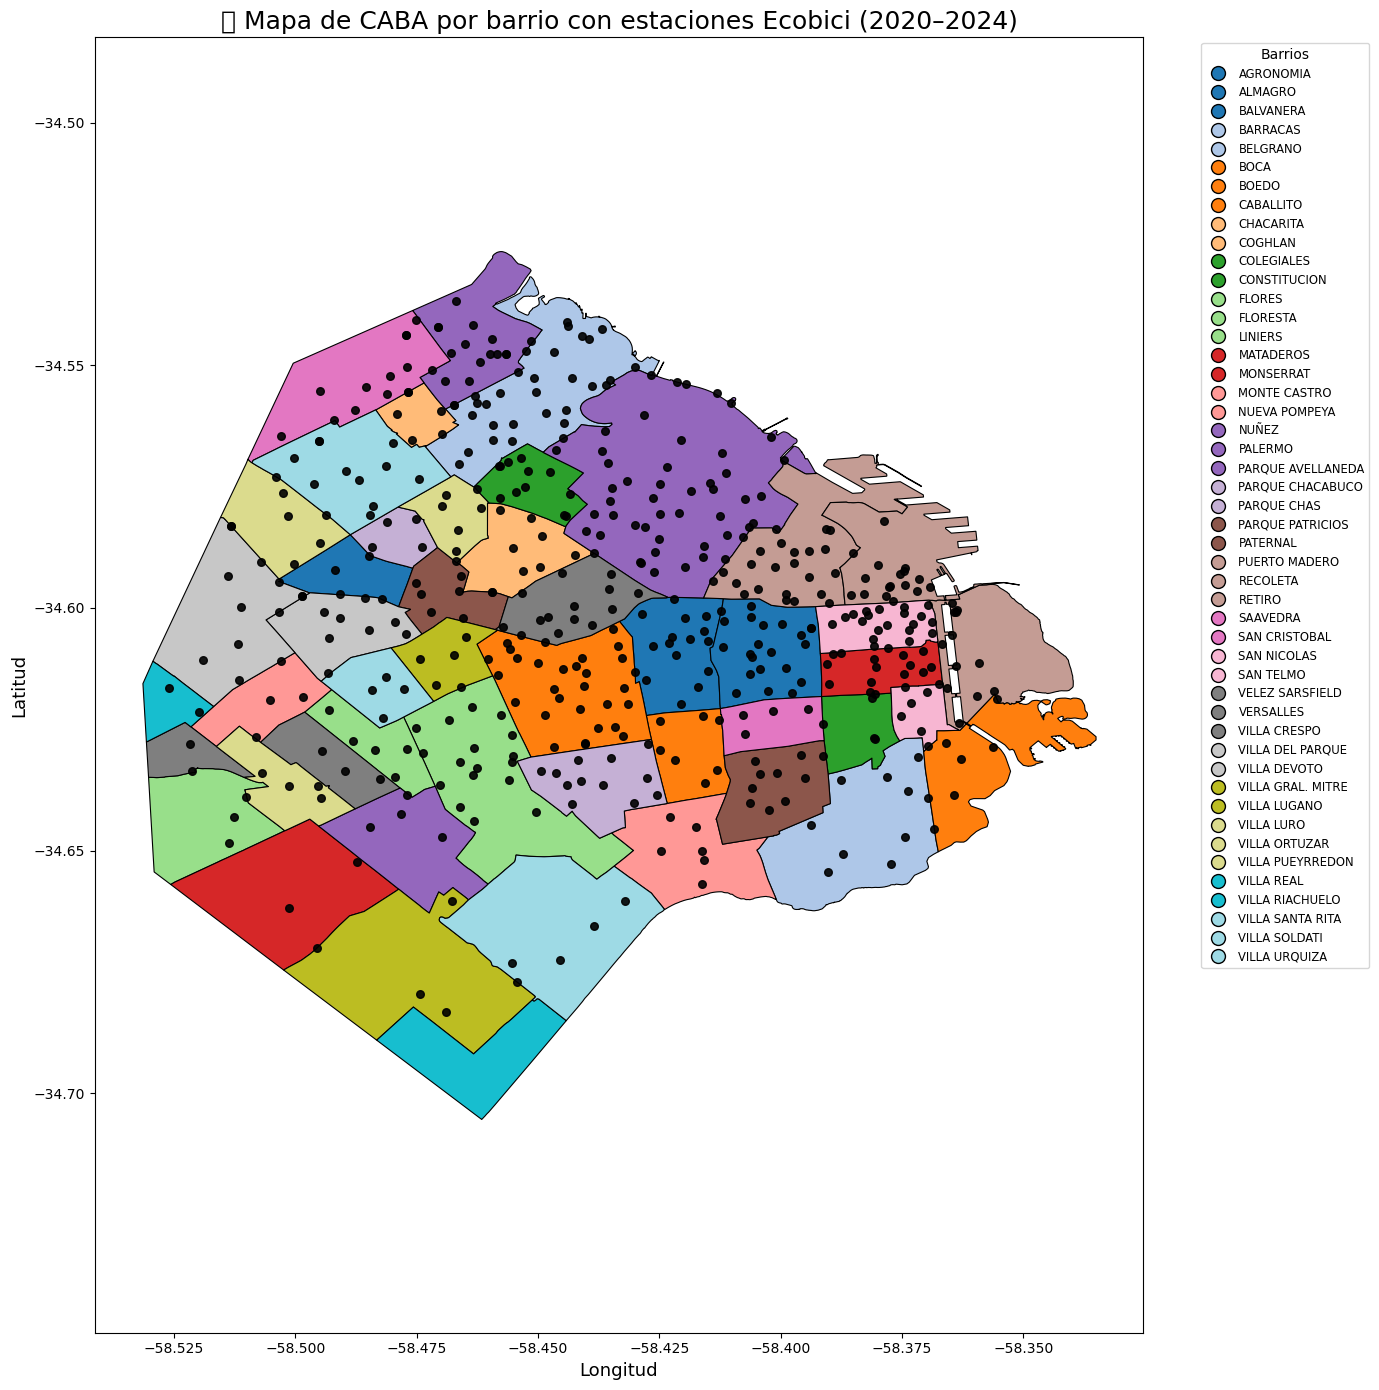

In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Leer barrios
barrios_gdf = gpd.read_file("data/barrios/barrios.shp")

# Asegurarte que estaciones_con_barrios ya tiene "geometry"
# y que es un GeoDataFrame con el mismo CRS

import matplotlib.cm as cm

# Lista de colores automáticos (pueden reemplazarse por hardcodeados si preferís)
barrios_unicos = sorted(barrios_gdf["nombre"].unique())
cmap = cm.get_cmap("tab20", len(barrios_unicos))
color_dict = {barrio: cmap(i) for i, barrio in enumerate(barrios_unicos)}

plt.figure(figsize=(14, 14))
ax = plt.gca()

# Pintar los barrios con sus polígonos coloreados
for barrio, shape in barrios_gdf.groupby("nombre"):
    shape.plot(ax=ax, color=color_dict[barrio], edgecolor="black", linewidth=0.8, label=barrio)

# Agregar las estaciones como puntos rojos con borde negro
estaciones_con_barrios.plot(ax=ax, color="black", edgecolor="black", markersize=30, alpha=0.9)

# Estética
plt.title("🗺️ Mapa de CABA por barrio con estaciones Ecobici (2020–2024)", fontsize=18)
plt.xlabel("Longitud", fontsize=13)
plt.ylabel("Latitud", fontsize=13)
plt.axis("equal")

# Leyenda con nombres de barrio
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[barrio],
                      markeredgecolor='black', markersize=10, label=barrio)
           for barrio in barrios_unicos]
plt.legend(handles=handles, title="Barrios", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")

plt.tight_layout()
plt.show()

/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_79766/1098386498.py:44: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/opt/anaconda3/lib/python3.12/site-packages/geopandas/plotting.py:482: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  ax.figure.canvas.draw_idle()
/opt/anaconda3/lib/python3.12/site-packages/geopandas/plotting.py:482: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  ax.figure.canvas.draw_idle()
/opt/anaconda3/lib/python3.12/site-packages/geopandas/plotting.py:482: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  ax.figure.canvas.draw_idle()
/opt/anaconda3/lib/python3.12/site-packages/geopandas/plotting.py:482: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  ax.figure.canvas.draw_idle()
/opt/anaconda3/lib/python3.12/site-packages/geopandas/plotting.py:482: UserWarning: Glyph 1

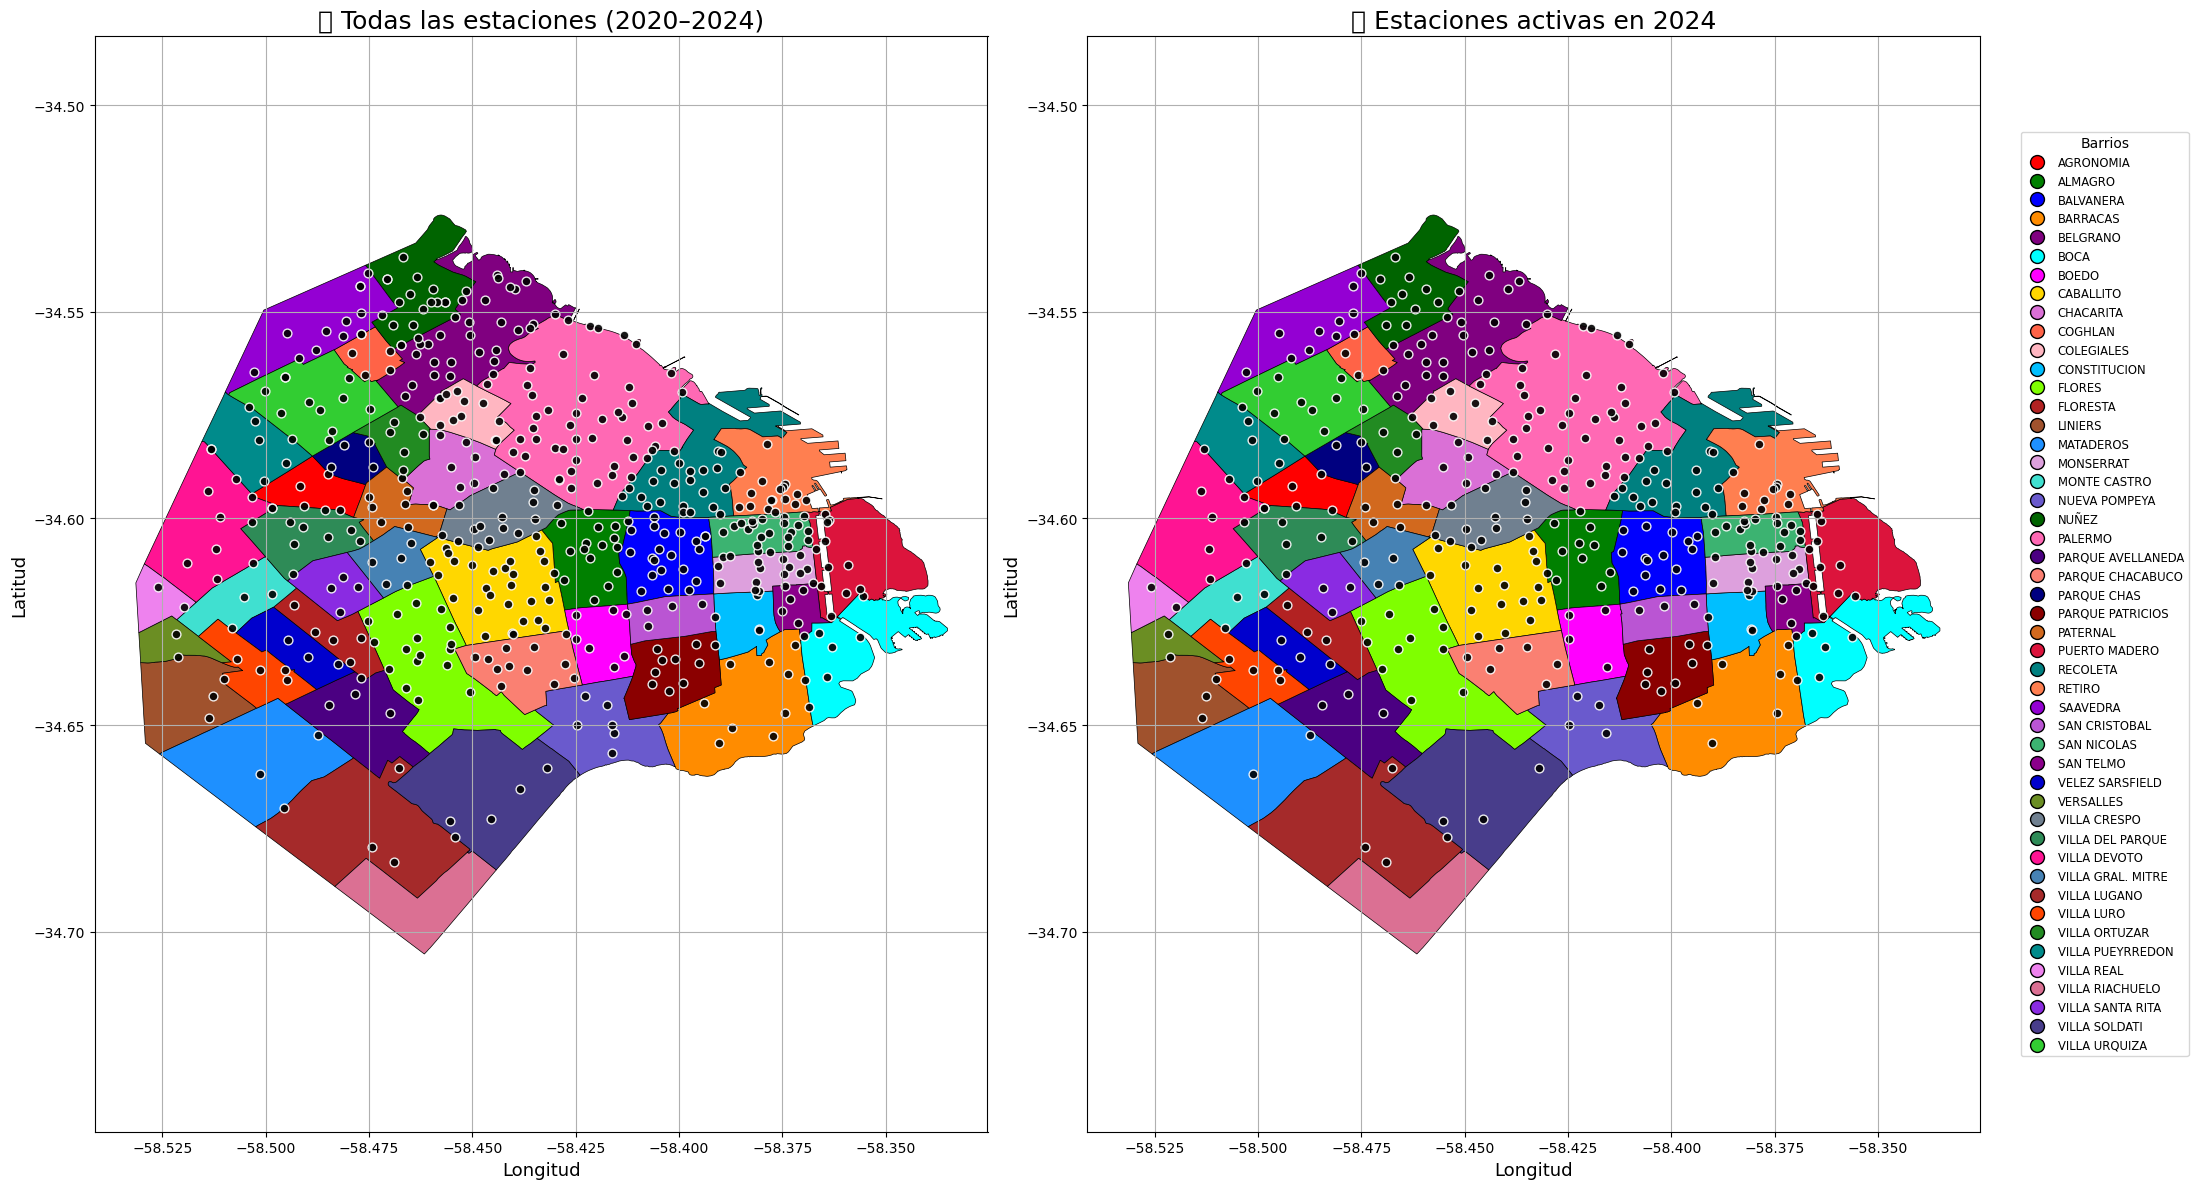

In [63]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.lines import Line2D

# ----------------------
# COLORES HARDCODEADOS
# ----------------------
colores_barrios = [
    "red", "green", "blue", "darkorange", "purple", "cyan", "magenta", "gold",
    "orchid", "tomato", "lightpink", "deepskyblue", "chartreuse", "firebrick", "sienna", "dodgerblue",
    "plum", "turquoise", "slateblue", "darkgreen", "hotpink", "indigo", "salmon", "navy",
    "darkred", "chocolate", "crimson", "teal", "coral", "darkviolet", "mediumorchid", "mediumseagreen",
    "darkmagenta", "mediumblue", "olivedrab", "slategray", "seagreen", "deeppink", "steelblue", "brown",
    "orangered", "forestgreen", "darkcyan", "violet", "palevioletred", "blueviolet", "darkslateblue", "limegreen"
]

# ----------------------
# CARGAR BARRIOS
# ----------------------
barrios_gdf = gpd.read_file("data/barrios/barrios.shp")
barrios_gdf = barrios_gdf.to_crs(epsg=4326)  # Asegurar sistema de referencia compatible

# Asignar color a cada barrio
barrios_unicos = sorted(barrios_gdf["nombre"].unique())
assert len(colores_barrios) == len(barrios_unicos), "La cantidad de colores no coincide con la de barrios"
color_dict = {barrio: colores_barrios[i] for i, barrio in enumerate(barrios_unicos)}

# ----------------------
# CARGAR ESTACIONES DE TODOS LOS AÑOS
# ----------------------
archivos = [
    "data/recorridos/processed/trips_2024_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2020_pr.csv"
]

estaciones_dict = {}

for path in archivos:
    df = pd.read_csv(path)
    for rol in ["origen", "destino"]:
        for _, row in df.iterrows():
            est_id = row[f"id_estacion_{rol}"]
            lat = row[f"lat_estacion_{rol}"]
            lon = row[f"long_estacion_{rol}"]
            if pd.notna(est_id) and pd.notna(lat) and pd.notna(lon):
                if est_id not in estaciones_dict:
                    estaciones_dict[est_id] = (lat, lon)

# GeoDataFrame de TODAS las estaciones
df_estaciones_todas = pd.DataFrame([
    {"id_estacion": est_id, "lat": lat, "lon": lon}
    for est_id, (lat, lon) in estaciones_dict.items()
])
df_estaciones_todas["geometry"] = df_estaciones_todas.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
gdf_estaciones_todas = gpd.GeoDataFrame(df_estaciones_todas, geometry="geometry", crs="EPSG:4326")

# GeoDataFrame de estaciones 2024
df_2024 = pd.read_csv("data/recorridos/processed/trips_2024_pr.csv")
estaciones_2024 = {}

for rol in ["origen", "destino"]:
    for _, row in df_2024.iterrows():
        est_id = row[f"id_estacion_{rol}"]
        lat = row[f"lat_estacion_{rol}"]
        lon = row[f"long_estacion_{rol}"]
        if pd.notna(est_id) and pd.notna(lat) and pd.notna(lon):
            if est_id not in estaciones_2024:
                estaciones_2024[est_id] = (lat, lon)

df_estaciones_2024 = pd.DataFrame([
    {"id_estacion": est_id, "lat": lat, "lon": lon}
    for est_id, (lat, lon) in estaciones_2024.items()
])
df_estaciones_2024["geometry"] = df_estaciones_2024.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
gdf_estaciones_2024 = gpd.GeoDataFrame(df_estaciones_2024, geometry="geometry", crs="EPSG:4326")

# ----------------------
# PLOTEO
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(20, 12))
ax1, ax2 = axes

# PLOT 1: todas las estaciones
for barrio, shape in barrios_gdf.groupby("nombre"):
    shape.plot(ax=ax1, color=color_dict[barrio], edgecolor="black", linewidth=0.5)

gdf_estaciones_todas.plot(ax=ax1, color="black", edgecolor="white", markersize=40, alpha=0.9)
ax1.set_title("📍 Todas las estaciones (2020–2024)", fontsize=18)
ax1.set_xlabel("Longitud", fontsize=13)
ax1.set_ylabel("Latitud", fontsize=13)
ax1.axis("equal")
ax1.grid(True)

# PLOT 2: estaciones solo de 2024
for barrio, shape in barrios_gdf.groupby("nombre"):
    shape.plot(ax=ax2, color=color_dict[barrio], edgecolor="black", linewidth=0.5)

gdf_estaciones_2024.plot(ax=ax2, color="black", edgecolor="white", markersize=40, alpha=0.9)
ax2.set_title("📍 Estaciones activas en 2024", fontsize=18)
ax2.set_xlabel("Longitud", fontsize=13)
ax2.set_ylabel("Latitud", fontsize=13)
ax2.axis("equal")
ax2.grid(True)

# LEYENDA COMÚN
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[barrio],
           markeredgecolor='black', markersize=10, label=barrio)
    for barrio in barrios_unicos
]

fig.legend(handles=handles, title="Barrios", loc="center left", bbox_to_anchor=(1.01, 0.5), fontsize="small")
plt.tight_layout()
plt.show()